Notes on how to compare time series
- First Method
    - Identify common model that describes each series separately 
        - ARIMA model or Multiply-trended Regression Model
        - Construct F test to test hypothesis of a common set of 
        parameters
- Granger test/causality
    - Tests if one time series is useful in forecasting another
- Pearson Correlation Coefficient
- Adaptive Weiner filter
- Dynamic Time Warping see https://github.com/alexminnaar/time-series-classification-and-clustering
- Analysing FFT coefficients see https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/fftpack.html


Notes on sub categories of comparison
- Value comparison
- Trend comparison
- Distribution comparison
- Distance analysis

In [1]:
%matplotlib inline
from __future__ import division
from scipy import signal         # Used for converting from time domain to power spectrum 
from scipy import stats          # Used for computing spectral moments
from scipy import integrate      # Used for computing spectral moments
import pandas                    # Used for data handling and manipulation
import matplotlib.pyplot as plt  # Used for plotting spectrum
import matplotlib.pylab as pylab # Used for increasing size of plot
import numpy as np

In [2]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True) # Run plotly offline

In [3]:
# Read MPU accelerometer and gyroscope into pandas data frame
# m0 = pandas.read_csv('RPi/Data_for_python/m0.csv')    # No data 
m1 = pandas.read_csv('RPi/Data_for_python/m1.csv')
m2 = pandas.read_csv('RPi/Data_for_python/m2.csv')
m3 = pandas.read_csv('RPi/Data_for_python/m3.csv')
m4 = pandas.read_csv('RPi/Data_for_python/m4.csv')
m5 = pandas.read_csv('RPi/Data_for_python/m5.csv')
m6 = pandas.read_csv('RPi/Data_for_python/m6.csv')
m7 = pandas.read_csv('RPi/Data_for_python/m7.csv')
m8 = pandas.read_csv('RPi/Data_for_python/m8.csv')
m9 = pandas.read_csv('RPi/Data_for_python/m9.csv')

In [4]:
# Read MPU pitch, roll, yaw into pandas data frame
dm0 = pandas.read_csv('RPi/Data_for_python/dm0.csv')     
# dm1 = pandas.read_csv('RPi/Data_for_python/dm1.csv')   # No data
dm2 = pandas.read_csv('RPi/Data_for_python/dm2.csv')
dm3 = pandas.read_csv('RPi/Data_for_python/dm3.csv')
dm4 = pandas.read_csv('RPi/Data_for_python/dm4.csv')
dm5 = pandas.read_csv('RPi/Data_for_python/dm5.csv')
dm6 = pandas.read_csv('RPi/Data_for_python/dm6.csv')
dm7 = pandas.read_csv('RPi/Data_for_python/dm7.csv')
dm8 = pandas.read_csv('RPi/Data_for_python/dm8.csv')
dm9 = pandas.read_csv('RPi/Data_for_python/dm9.csv')

In [5]:
# Read LSM accelerometer and gyroscope into pandas data frame
l0 = pandas.read_csv('RPi/Data_for_python/l0.csv')    
l1 = pandas.read_csv('RPi/Data_for_python/l1.csv')
l2 = pandas.read_csv('RPi/Data_for_python/l2.csv')
l3 = pandas.read_csv('RPi/Data_for_python/l3.csv')
l4 = pandas.read_csv('RPi/Data_for_python/l4.csv')
l5 = pandas.read_csv('RPi/Data_for_python/l5.csv')
l6 = pandas.read_csv('RPi/Data_for_python/l6.csv')
l7 = pandas.read_csv('RPi/Data_for_python/l7.csv')
l8 = pandas.read_csv('RPi/Data_for_python/l8.csv')
l9 = pandas.read_csv('RPi/Data_for_python/l9.csv')

In [6]:
# Read LSM pitch, roll, yaw into pandas data frame
dl0 = pandas.read_csv('RPi/Data_for_python/dl0.csv')    
dl1 = pandas.read_csv('RPi/Data_for_python/dl1.csv')
dl2 = pandas.read_csv('RPi/Data_for_python/dl2.csv')
dl3 = pandas.read_csv('RPi/Data_for_python/dl3.csv')
dl4 = pandas.read_csv('RPi/Data_for_python/dl4.csv')
dl5 = pandas.read_csv('RPi/Data_for_python/dl5.csv')
dl6 = pandas.read_csv('RPi/Data_for_python/dl6.csv')
dl7 = pandas.read_csv('RPi/Data_for_python/dl7.csv')
dl8 = pandas.read_csv('RPi/Data_for_python/dl8.csv')
dl9 = pandas.read_csv('RPi/Data_for_python/dl9.csv')

In [7]:
# Read Qualisys pitch, roll, yaw BODY data into pandas data frame
# qb0 = pandas.read_csv('Qualisys/Data_for_python/qb0.tsv',delimiter='\t')   # No data
qb1 = pandas.read_csv('Qualisys/Data_for_python/qb1.tsv',delimiter='\t')
qb2 = pandas.read_csv('Qualisys/Data_for_python/qb2.tsv',delimiter='\t')
qb3 = pandas.read_csv('Qualisys/Data_for_python/qb3.tsv',delimiter='\t')
qb4 = pandas.read_csv('Qualisys/Data_for_python/qb4.tsv',delimiter='\t')
qb5 = pandas.read_csv('Qualisys/Data_for_python/qb5.tsv',delimiter='\t')
qb6 = pandas.read_csv('Qualisys/Data_for_python/qb6.tsv',delimiter='\t')
qb7 = pandas.read_csv('Qualisys/Data_for_python/qb7.tsv',delimiter='\t')
qb8 = pandas.read_csv('Qualisys/Data_for_python/qb8.tsv',delimiter='\t')
qb9 = pandas.read_csv('Qualisys/Data_for_python/qb9.tsv',delimiter='\t')

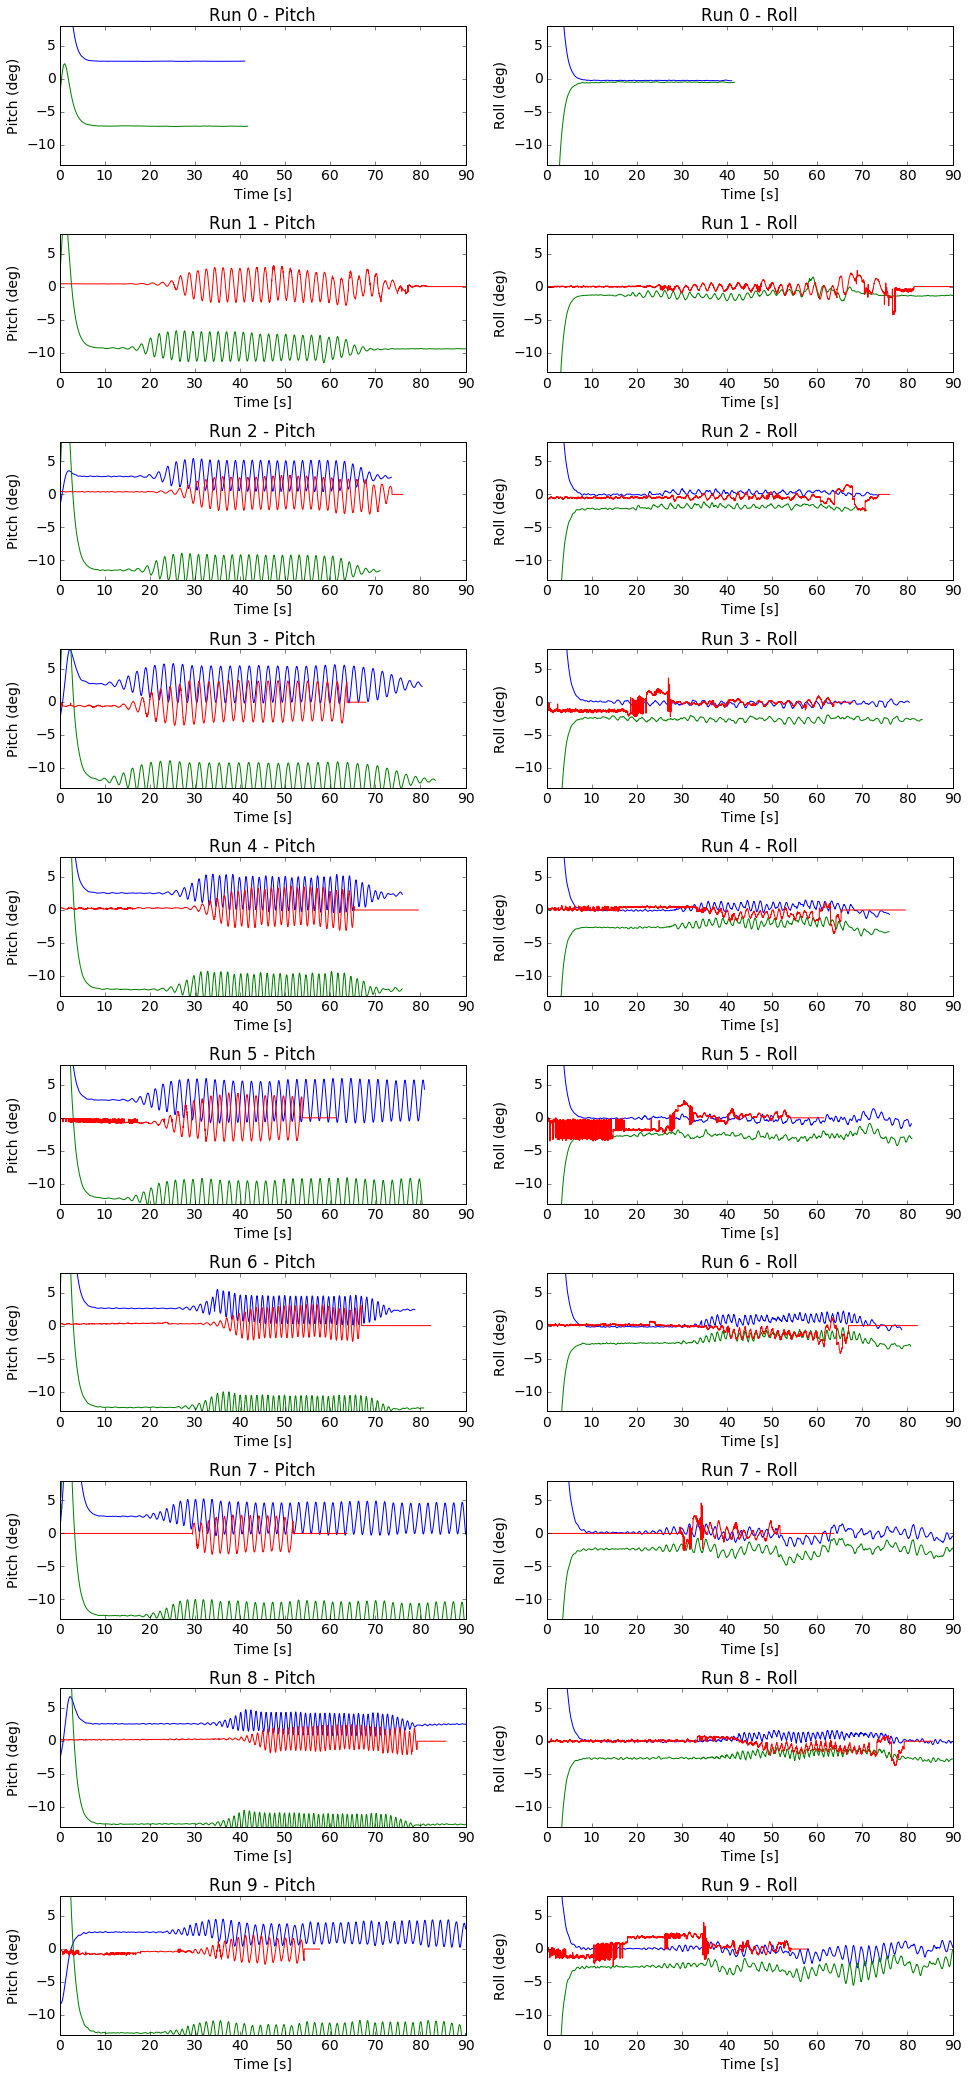

In [24]:
plt.figure()
pylab.rcParams['figure.figsize'] = 16, 36  # Length, Height
pylab.rcParams['font.size'] = 14
plt.subplots_adjust(hspace=.5)

ylow = -13
yhigh = 8

xlow = 0
xhigh = 90

plt.subplot(10,2,1)
plt.plot(dm0['Time'],dm0['Pitch (deg)'],'b',dl0['Time'],dl0['Pitch (deg)'],'g')
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 0 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,3)
plt.plot(dl1['Time'],dl1['Pitch (deg)'],'g',qb1['Time'],qb1['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 1 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,5)
plt.plot(dm2['Time'],dm2['Pitch (deg)'],'b',dl2['Time'],dl2['Pitch (deg)'],'g',qb2['Time'],qb2['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 2 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,7)
plt.plot(dm3['Time'],dm3['Pitch (deg)'],'b',dl3['Time'],dl3['Pitch (deg)'],'g',qb3['Time'],qb3['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 3 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,9)
plt.plot(dm4['Time'],dm4['Pitch (deg)'],'b',dl4['Time'],dl4['Pitch (deg)'],'g',qb4['Time'],qb4['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 4 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,11)
plt.plot(dm5['Time'],dm5['Pitch (deg)'],'b',dl5['Time'],dl5['Pitch (deg)'],'g',qb5['Time'],qb5['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 5 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,13)
plt.plot(dm6['Time'],dm6['Pitch (deg)'],'b',dl6['Time'],dl6['Pitch (deg)'],'g',qb6['Time'],qb6['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 6 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,15)
plt.plot(dm7['Time'],dm7['Pitch (deg)'],'b',dl7['Time'],dl7['Pitch (deg)'],'g',qb7['Time'],qb7['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 7 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,17)
plt.plot(dm8['Time'],dm8['Pitch (deg)'],'b',dl8['Time'],dl8['Pitch (deg)'],'g',qb8['Time'],qb8['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 8 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,19)
plt.plot(dm9['Time'],dm9['Pitch (deg)'],'b',dl9['Time'],dl9['Pitch (deg)'],'g',qb9['Time'],qb9['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 9 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,2)
plt.plot(dm0['Time'],dm0['Roll (deg)'],'b',dl0['Time'],dl0['Roll (deg)'],'g')
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 0 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,4)
plt.plot(dl1['Time'],dl1['Roll (deg)'],'g',qb1['Time'],qb1['Roll'],'r') # No data
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 1 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,6)
plt.plot(dm2['Time'],dm2['Roll (deg)'],'b',dl2['Time'],dl2['Roll (deg)'],'g',qb2['Time'],qb2['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 2 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,8)
plt.plot(dm3['Time'],dm3['Roll (deg)'],'b',dl3['Time'],dl3['Roll (deg)'],'g',qb3['Time'],qb3['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 3 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,10)
plt.plot(dm4['Time'],dm4['Roll (deg)'],'b',dl4['Time'],dl4['Roll (deg)'],'g',qb4['Time'],qb4['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 4 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,12)
plt.plot(dm5['Time'],dm5['Roll (deg)'],'b',dl5['Time'],dl5['Roll (deg)'],'g',qb5['Time'],qb5['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 5 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,14)
plt.plot(dm6['Time'],dm6['Roll (deg)'],'b',dl6['Time'],dl6['Roll (deg)'],'g',qb6['Time'],qb6['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 6 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,16)
plt.plot(dm7['Time'],dm7['Roll (deg)'],'b',dl7['Time'],dl7['Roll (deg)'],'g',qb7['Time'],qb7['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 7 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,18)
plt.plot(dm8['Time'],dm8['Roll (deg)'],'b',dl8['Time'],dl8['Roll (deg)'],'g',qb8['Time'],qb8['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 8 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,20)
plt.plot(dm9['Time'],dm9['Roll (deg)'],'b',dl9['Time'],dl9['Roll (deg)'],'g',qb9['Time'],qb9['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 9 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

In [9]:
sy_dm0 = dm0.copy()
#sy_dm1 = dm1.copy()
sy_dm2 = dm2.copy()
sy_dm3 = dm3.copy()
sy_dm4 = dm4.copy()
sy_dm5 = dm5.copy()
sy_dm6 = dm6.copy()
sy_dm7 = dm7.copy()
sy_dm8 = dm8.copy()
sy_dm9 = dm9.copy()

# Synchronize time series
sy_dm0['Time'] = sy_dm0['Time'] + 0 
# sy_dm1['Time'] = sy_dm1['Time'] + 0   No data
sy_dm2['Time'] = sy_dm2['Time'] + 4.59667
sy_dm3['Time'] = sy_dm3['Time'] + 3.16387
sy_dm4['Time'] = sy_dm4['Time'] + 4.07733
sy_dm5['Time'] = sy_dm5['Time'] + 4.986
sy_dm6['Time'] = sy_dm6['Time'] + 6.1272
sy_dm7['Time'] = sy_dm7['Time'] + 0
sy_dm8['Time'] = sy_dm8['Time'] + 6.2235
sy_dm9['Time'] = sy_dm9['Time'] + 5.0182

# Remove systematic error
sy_dm0['Pitch (deg)'] = sy_dm0['Pitch (deg)'] - 2.66
# sy_dm1['Pitch (deg)'] = sy_dm1['Pitch (deg)'] - 2.69 No data
sy_dm2['Pitch (deg)'] = sy_dm2['Pitch (deg)'] - 2.69
sy_dm3['Pitch (deg)'] = sy_dm3['Pitch (deg)'] - 2.78
sy_dm4['Pitch (deg)'] = sy_dm4['Pitch (deg)'] - 2.58
sy_dm5['Pitch (deg)'] = sy_dm5['Pitch (deg)'] - 2.8
sy_dm6['Pitch (deg)'] = sy_dm6['Pitch (deg)'] - 2.61
sy_dm7['Pitch (deg)'] = sy_dm7['Pitch (deg)'] - 2.59
sy_dm8['Pitch (deg)'] = sy_dm8['Pitch (deg)'] - 2.63
sy_dm9['Pitch (deg)'] = sy_dm9['Pitch (deg)'] - 2.56

In [10]:
sy_dl0 = dl0.copy()
sy_dl1 = dl1.copy()
sy_dl2 = dl2.copy()
sy_dl3 = dl3.copy()
sy_dl4 = dl4.copy()
sy_dl5 = dl5.copy()
sy_dl6 = dl6.copy()
sy_dl7 = dl7.copy()
sy_dl8 = dl8.copy()
sy_dl9 = dl9.copy()

# Synchronize time series
sy_dl0['Time'] = sy_dl0['Time'] + 0.3015 
sy_dl1['Time'] = sy_dl1['Time'] + 6.6644   
sy_dl2['Time'] = sy_dl2['Time'] + 7.13777
sy_dl3['Time'] = sy_dl3['Time'] + 4.2
sy_dl4['Time'] = sy_dl4['Time'] + 5.19933
sy_dl5['Time'] = sy_dl5['Time'] + 5.9766
sy_dl6['Time'] = sy_dl6['Time'] + 4.803
sy_dl7['Time'] = sy_dl7['Time'] + 0.0611
sy_dl8['Time'] = sy_dl8['Time'] + 6.54
sy_dl9['Time'] = sy_dl9['Time'] + 5.4656

# Remove systematic error
sy_dl0['Pitch (deg)'] = sy_dl0['Pitch (deg)'] + 7.19
sy_dl1['Pitch (deg)'] = sy_dl1['Pitch (deg)'] + 9.23
sy_dl2['Pitch (deg)'] = sy_dl2['Pitch (deg)'] + 11.49
sy_dl3['Pitch (deg)'] = sy_dl3['Pitch (deg)'] + 11.93
sy_dl4['Pitch (deg)'] = sy_dl4['Pitch (deg)'] + 12.01
sy_dl5['Pitch (deg)'] = sy_dl5['Pitch (deg)'] + 12.25
sy_dl6['Pitch (deg)'] = sy_dl6['Pitch (deg)'] + 12.4
sy_dl7['Pitch (deg)'] = sy_dl7['Pitch (deg)'] + 12.46
sy_dl8['Pitch (deg)'] = sy_dl8['Pitch (deg)'] + 12.54
sy_dl9['Pitch (deg)'] = sy_dl9['Pitch (deg)'] + 12.73

In [11]:
sy_qb1 = qb1.copy()
sy_qb2 = qb2.copy()
sy_qb3 = qb3.copy()
sy_qb4 = qb4.copy()
sy_qb5 = qb5.copy()
sy_qb6 = qb6.copy()
sy_qb7 = qb7.copy()
sy_qb8 = qb8.copy()
sy_qb9 = qb9.copy()

# Synchronize time series
sy_qb7['Time'] = sy_qb7['Time'] - 3.0

# Remove systematic error
sy_qb1['Pitch'] = sy_qb1['Pitch'] - 0.39
sy_qb2['Pitch'] = sy_qb2['Pitch'] - 0.39
sy_qb3['Pitch'] = sy_qb3['Pitch'] + 0.59
sy_qb4['Pitch'] = sy_qb4['Pitch'] - 0.30
sy_qb5['Pitch'] = sy_qb5['Pitch'] + 0.0
sy_qb6['Pitch'] = sy_qb6['Pitch'] - 0.32
sy_qb7['Pitch'] = sy_qb7['Pitch']
sy_qb8['Pitch'] = sy_qb8['Pitch'] - 0.25
sy_qb9['Pitch'] = sy_qb9['Pitch'] + 0.39

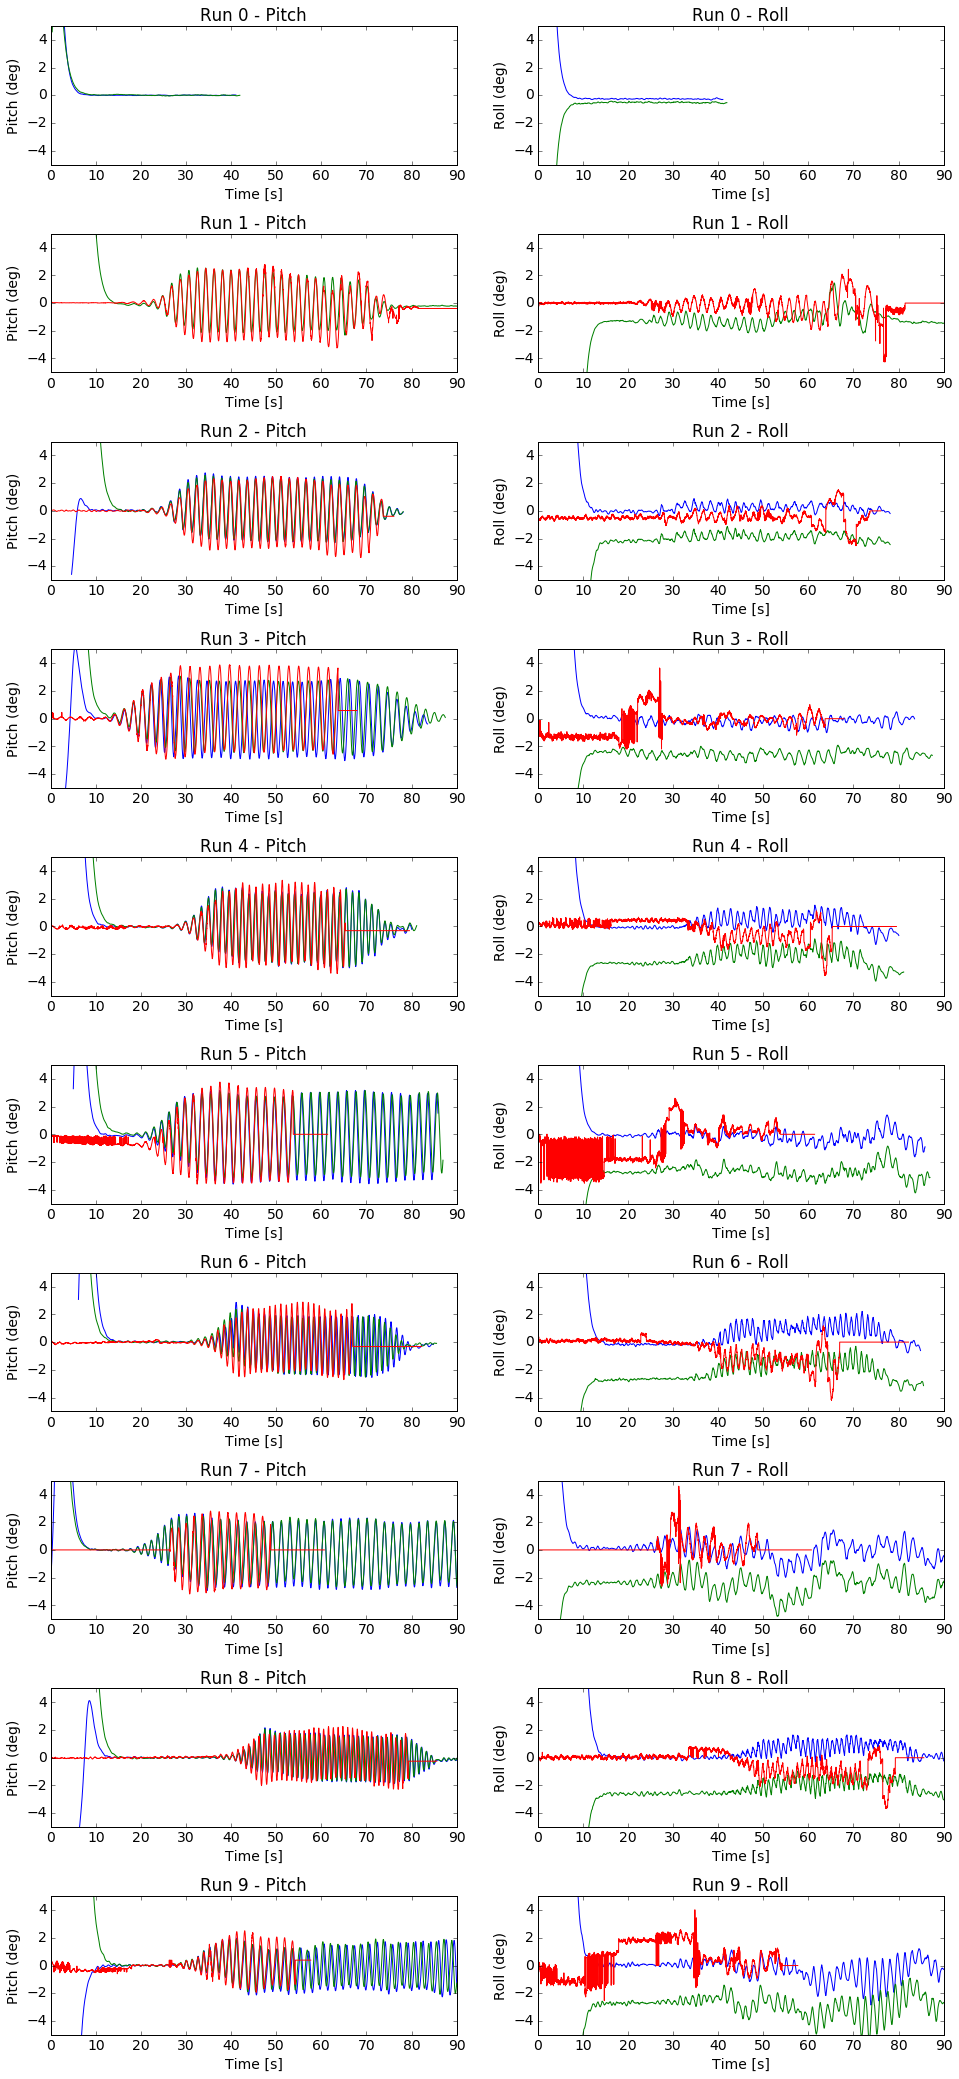

In [12]:
plt.figure()
pylab.rcParams['figure.figsize'] = 16, 36  # Length, Height
pylab.rcParams['font.size'] = 14
plt.subplots_adjust(hspace=.5)

ylow = -5
yhigh = 5

xlow = 0
xhigh = 90

plt.subplot(10,2,1)
plt.plot(sy_dm0['Time'],sy_dm0['Pitch (deg)'],'b',sy_dl0['Time'],sy_dl0['Pitch (deg)'],'g')
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 0 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,3)
plt.plot(sy_dl1['Time'],sy_dl1['Pitch (deg)'],'g',sy_qb1['Time'],sy_qb1['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 1 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,5)
plt.plot(sy_dm2['Time'],sy_dm2['Pitch (deg)'],'b',sy_dl2['Time'],sy_dl2['Pitch (deg)'],'g',sy_qb2['Time'],sy_qb2['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 2 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,7)
plt.plot(sy_dm3['Time'],sy_dm3['Pitch (deg)'],'b',sy_dl3['Time'],sy_dl3['Pitch (deg)'],'g',sy_qb3['Time'],sy_qb3['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 3 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,9)
plt.plot(sy_dm4['Time'],sy_dm4['Pitch (deg)'],'b',sy_dl4['Time'],sy_dl4['Pitch (deg)'],'g',sy_qb4['Time'],sy_qb4['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 4 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,11)
plt.plot(sy_dm5['Time'],sy_dm5['Pitch (deg)'],'b',sy_dl5['Time'],sy_dl5['Pitch (deg)'],'g',sy_qb5['Time'],sy_qb5['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 5 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,13)
plt.plot(sy_dm6['Time'],sy_dm6['Pitch (deg)'],'b',sy_dl6['Time'],sy_dl6['Pitch (deg)'],'g',sy_qb6['Time'],sy_qb6['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 6 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,15)
plt.plot(sy_dm7['Time'],sy_dm7['Pitch (deg)'],'b',sy_dl7['Time'],sy_dl7['Pitch (deg)'],'g',sy_qb7['Time'],sy_qb7['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 7 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,17)
plt.plot(sy_dm8['Time'],sy_dm8['Pitch (deg)'],'b',sy_dl8['Time'],sy_dl8['Pitch (deg)'],'g',sy_qb8['Time'],sy_qb8['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 8 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,19)
plt.plot(sy_dm9['Time'],sy_dm9['Pitch (deg)'],'b',sy_dl9['Time'],sy_dl9['Pitch (deg)'],'g',sy_qb9['Time'],sy_qb9['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 9 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,2)
plt.plot(sy_dm0['Time'],sy_dm0['Roll (deg)'],'b',sy_dl0['Time'],sy_dl0['Roll (deg)'],'g')
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 0 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,4)
plt.plot(sy_dl1['Time'],sy_dl1['Roll (deg)'],'g',sy_qb1['Time'],sy_qb1['Roll'],'r') # No data
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 1 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,6)
plt.plot(sy_dm2['Time'],sy_dm2['Roll (deg)'],'b',sy_dl2['Time'],sy_dl2['Roll (deg)'],'g',sy_qb2['Time'],sy_qb2['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 2 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,8)
plt.plot(sy_dm3['Time'],sy_dm3['Roll (deg)'],'b',sy_dl3['Time'],sy_dl3['Roll (deg)'],'g',sy_qb3['Time'],sy_qb3['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 3 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,10)
plt.plot(sy_dm4['Time'],sy_dm4['Roll (deg)'],'b',sy_dl4['Time'],sy_dl4['Roll (deg)'],'g',sy_qb4['Time'],sy_qb4['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 4 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,12)
plt.plot(sy_dm5['Time'],sy_dm5['Roll (deg)'],'b',sy_dl5['Time'],sy_dl5['Roll (deg)'],'g',sy_qb5['Time'],sy_qb5['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 5 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,14)
plt.plot(sy_dm6['Time'],sy_dm6['Roll (deg)'],'b',sy_dl6['Time'],sy_dl6['Roll (deg)'],'g',sy_qb6['Time'],sy_qb6['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 6 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,16)
plt.plot(sy_dm7['Time'],sy_dm7['Roll (deg)'],'b',sy_dl7['Time'],sy_dl7['Roll (deg)'],'g',sy_qb7['Time'],sy_qb7['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 7 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,18)
plt.plot(sy_dm8['Time'],sy_dm8['Roll (deg)'],'b',sy_dl8['Time'],sy_dl8['Roll (deg)'],'g',sy_qb8['Time'],sy_qb8['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 8 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,20)
plt.plot(sy_dm9['Time'],sy_dm9['Roll (deg)'],'b',sy_dl9['Time'],sy_dl9['Roll (deg)'],'g',sy_qb9['Time'],sy_qb9['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 9 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

In [13]:
sub_dm0 = sy_dm0.copy()[(sy_dm0.Time >= 10) & (sy_dm0.Time <= 40)]
# sub_dm1 = sy_dm1.copy()[(sy_dm1.Time >= 30) & (sy_dm1.Time <= 70)]
sub_dm2 = sy_dm2.copy()[(sy_dm2.Time >= 30) & (sy_dm2.Time <= 70)]
sub_dm3 = sy_dm3.copy()[(sy_dm3.Time >= 20) & (sy_dm3.Time <= 60)]
sub_dm4 = sy_dm4.copy()[(sy_dm4.Time >= 30) & (sy_dm4.Time <= 60)]
sub_dm5 = sy_dm5.copy()[(sy_dm5.Time >= 23) & (sy_dm5.Time <= 53)]
sub_dm6 = sy_dm6.copy()[(sy_dm6.Time >= 35) & (sy_dm6.Time <= 65)]
sub_dm7 = sy_dm7.copy()[(sy_dm7.Time >= 28) & (sy_dm7.Time <= 48)]
sub_dm8 = sy_dm8.copy()[(sy_dm8.Time >= 40) & (sy_dm8.Time <= 75)]
sub_dm9 = sy_dm9.copy()[(sy_dm9.Time >= 30) & (sy_dm9.Time <= 50)]

sub_dl0 = sy_dl0.copy()[(sy_dl0.Time >= 10) & (sy_dl0.Time <= 40)]
sub_dl1 = sy_dl1.copy()[(sy_dl1.Time >= 30) & (sy_dl1.Time <= 70)]
sub_dl2 = sy_dl2.copy()[(sy_dl2.Time >= 30) & (sy_dl2.Time <= 70)]
sub_dl3 = sy_dl3.copy()[(sy_dl3.Time >= 20) & (sy_dl3.Time <= 60)]
sub_dl4 = sy_dl4.copy()[(sy_dl4.Time >= 30) & (sy_dl4.Time <= 60)]
sub_dl5 = sy_dl5.copy()[(sy_dl5.Time >= 23) & (sy_dl5.Time <= 53)]
sub_dl6 = sy_dl6.copy()[(sy_dl6.Time >= 35) & (sy_dl6.Time <= 65)]
sub_dl7 = sy_dl7.copy()[(sy_dl7.Time >= 28) & (sy_dl7.Time <= 48)]
sub_dl8 = sy_dl8.copy()[(sy_dl8.Time >= 40) & (sy_dl8.Time <= 75)]
sub_dl9 = sy_dl9.copy()[(sy_dl9.Time >= 30) & (sy_dl9.Time <= 50)]

# sub_qb0 = sy_qb0.copy()[(sy_qb0.Time >= 10) & (sy_qb0.Time <= 40)]
sub_qb1 = sy_qb1.copy()[(sy_qb1.Time >= 30) & (sy_qb1.Time <= 70)]
sub_qb2 = sy_qb2.copy()[(sy_qb2.Time >= 30) & (sy_qb2.Time <= 70)]
sub_qb3 = sy_qb3.copy()[(sy_qb3.Time >= 20) & (sy_qb3.Time <= 60)]
sub_qb4 = sy_qb4.copy()[(sy_qb4.Time >= 30) & (sy_qb4.Time <= 60)]
sub_qb5 = sy_qb5.copy()[(sy_qb5.Time >= 23) & (sy_qb5.Time <= 53)]
sub_qb6 = sy_qb6.copy()[(sy_qb6.Time >= 35) & (sy_qb6.Time <= 65)]
sub_qb7 = sy_qb7.copy()[(sy_qb7.Time >= 28) & (sy_qb7.Time <= 48)]
sub_qb8 = sy_qb8.copy()[(sy_qb8.Time >= 40) & (sy_qb8.Time <= 75)]
sub_qb9 = sy_qb9.copy()[(sy_qb9.Time >= 30) & (sy_qb9.Time <= 50)]

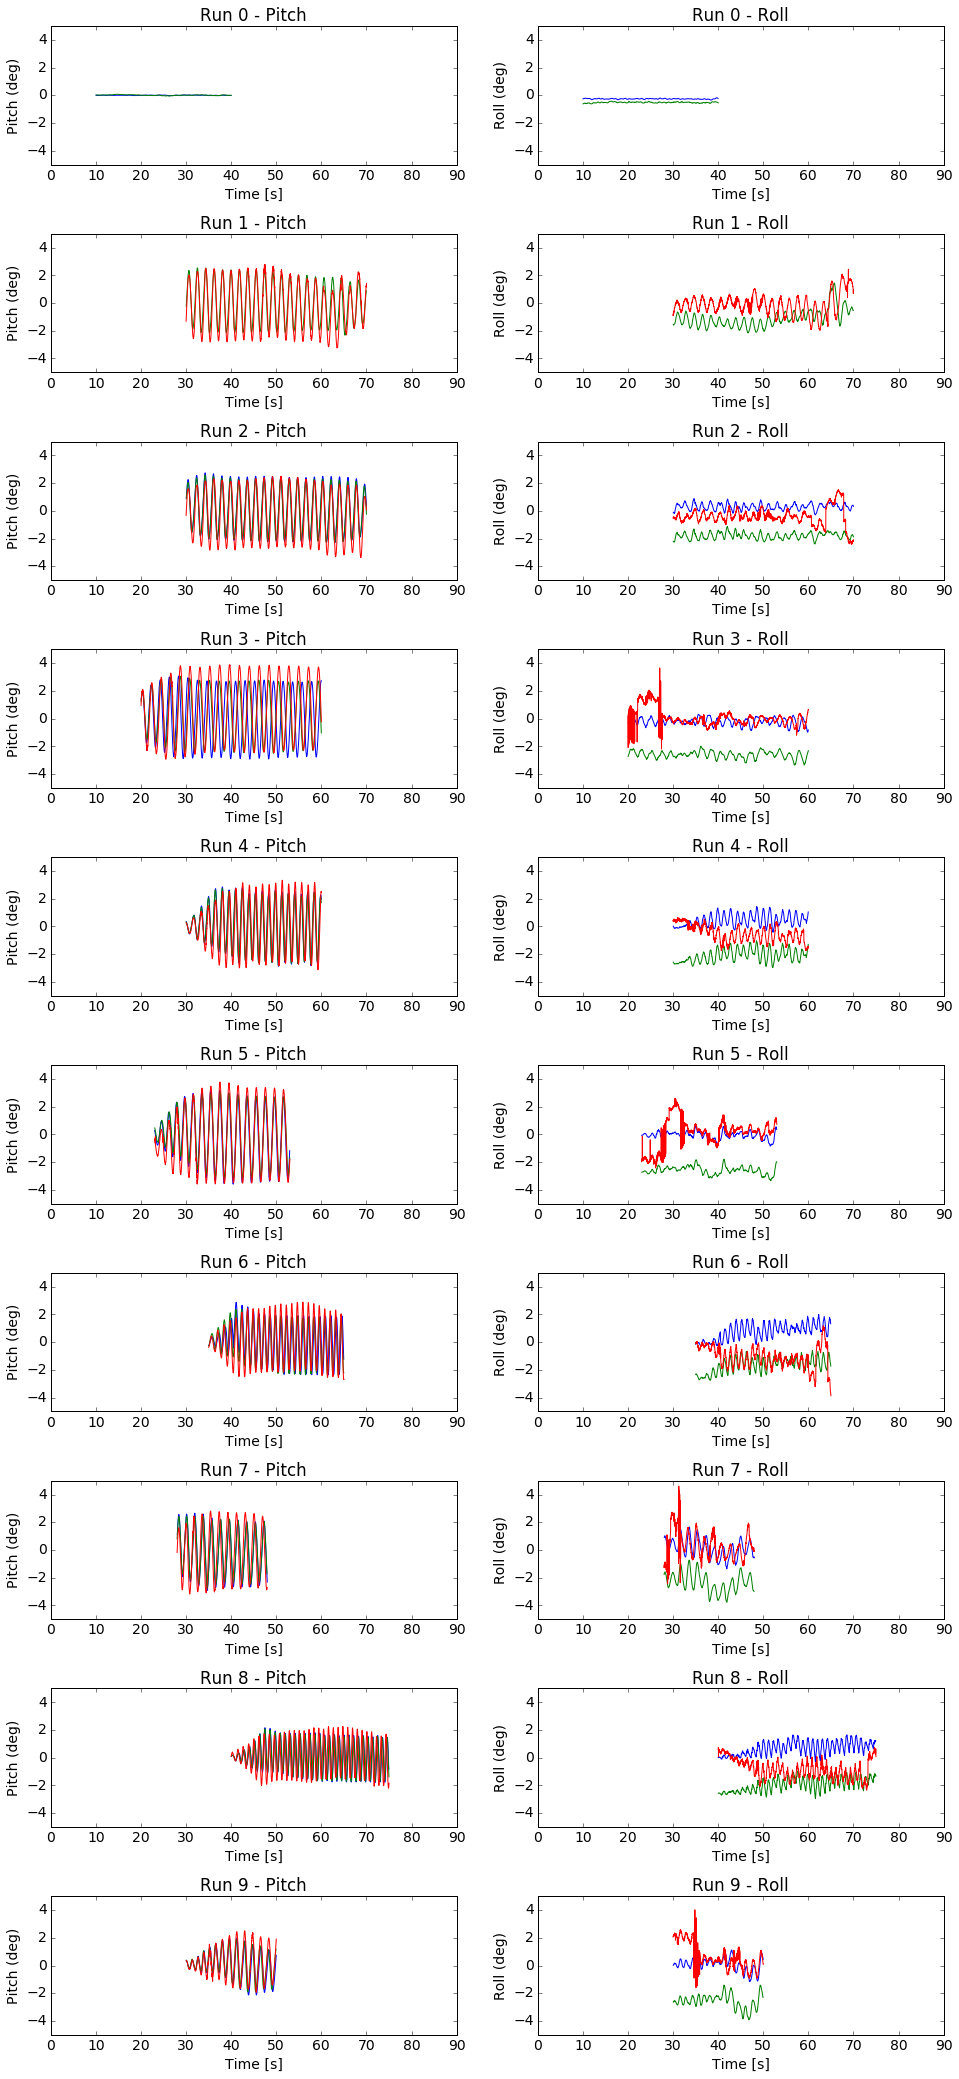

In [14]:
plt.figure()
pylab.rcParams['figure.figsize'] = 16, 36  # Length, Height
pylab.rcParams['font.size'] = 14
plt.subplots_adjust(hspace=.5)

ylow = -5
yhigh = 5

xlow = 0
xhigh = 90

plt.subplot(10,2,1)
plt.plot(sub_dm0['Time'],sub_dm0['Pitch (deg)'],'b',sub_dl0['Time'],sub_dl0['Pitch (deg)'],'g')
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 0 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,3)
plt.plot(sub_dl1['Time'],sub_dl1['Pitch (deg)'],'g',sub_qb1['Time'],sub_qb1['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 1 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,5)
plt.plot(sub_dm2['Time'],sub_dm2['Pitch (deg)'],'b',sub_dl2['Time'],sub_dl2['Pitch (deg)'],'g',sub_qb2['Time'],sub_qb2['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 2 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,7)
plt.plot(sub_dm3['Time'],sub_dm3['Pitch (deg)'],'b',sub_dl3['Time'],sub_dl3['Pitch (deg)'],'g',sub_qb3['Time'],sub_qb3['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 3 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,9)
plt.plot(sub_dm4['Time'],sub_dm4['Pitch (deg)'],'b',sub_dl4['Time'],sub_dl4['Pitch (deg)'],'g',sub_qb4['Time'],sub_qb4['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 4 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,11)
plt.plot(sub_dm5['Time'],sub_dm5['Pitch (deg)'],'b',sub_dl5['Time'],sub_dl5['Pitch (deg)'],'g',sub_qb5['Time'],sub_qb5['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 5 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,13)
plt.plot(sub_dm6['Time'],sub_dm6['Pitch (deg)'],'b',sub_dl6['Time'],sub_dl6['Pitch (deg)'],'g',sub_qb6['Time'],sub_qb6['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 6 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,15)
plt.plot(sub_dm7['Time'],sub_dm7['Pitch (deg)'],'b',sub_dl7['Time'],sub_dl7['Pitch (deg)'],'g',sub_qb7['Time'],sub_qb7['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 7 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,17)
plt.plot(sub_dm8['Time'],sub_dm8['Pitch (deg)'],'b',sub_dl8['Time'],sub_dl8['Pitch (deg)'],'g',sub_qb8['Time'],sub_qb8['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 8 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,19)
plt.plot(sub_dm9['Time'],sub_dm9['Pitch (deg)'],'b',sub_dl9['Time'],sub_dl9['Pitch (deg)'],'g',sub_qb9['Time'],sub_qb9['Pitch'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 9 - Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch (deg)')

plt.subplot(10,2,2)
plt.plot(sub_dm0['Time'],sub_dm0['Roll (deg)'],'b',sub_dl0['Time'],sub_dl0['Roll (deg)'],'g')
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 0 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,4)
plt.plot(sub_dl1['Time'],sub_dl1['Roll (deg)'],'g',sub_qb1['Time'],sub_qb1['Roll'],'r') # No data
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 1 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,6)
plt.plot(sub_dm2['Time'],sub_dm2['Roll (deg)'],'b',sub_dl2['Time'],sub_dl2['Roll (deg)'],'g',sub_qb2['Time'],sub_qb2['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 2 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,8)
plt.plot(sub_dm3['Time'],sub_dm3['Roll (deg)'],'b',sub_dl3['Time'],sub_dl3['Roll (deg)'],'g',sub_qb3['Time'],sub_qb3['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 3 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,10)
plt.plot(sub_dm4['Time'],sub_dm4['Roll (deg)'],'b',sub_dl4['Time'],sub_dl4['Roll (deg)'],'g',sub_qb4['Time'],sub_qb4['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 4 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,12)
plt.plot(sub_dm5['Time'],sub_dm5['Roll (deg)'],'b',sub_dl5['Time'],sub_dl5['Roll (deg)'],'g',sub_qb5['Time'],sub_qb5['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 5 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,14)
plt.plot(sub_dm6['Time'],sub_dm6['Roll (deg)'],'b',sub_dl6['Time'],sub_dl6['Roll (deg)'],'g',sub_qb6['Time'],sub_qb6['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 6 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,16)
plt.plot(sub_dm7['Time'],sub_dm7['Roll (deg)'],'b',sub_dl7['Time'],sub_dl7['Roll (deg)'],'g',sub_qb7['Time'],sub_qb7['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 7 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,18)
plt.plot(sub_dm8['Time'],sub_dm8['Roll (deg)'],'b',sub_dl8['Time'],sub_dl8['Roll (deg)'],'g',sub_qb8['Time'],sub_qb8['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 8 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')

plt.subplot(10,2,20)
plt.plot(sub_dm9['Time'],sub_dm9['Roll (deg)'],'b',sub_dl9['Time'],sub_dl9['Roll (deg)'],'g',sub_qb9['Time'],sub_qb9['Roll'],'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 9 - Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll (deg)')


In [15]:
len(qb1['Pitch'])

88209

In [16]:
# Compute Pitch PSD
f_dm0_p, Pxx_dm0_p = signal.welch(dm0['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dm0['Pitch (deg)']), nperseg=len(dm0['Pitch (deg)']), scaling='density')
f_dm2_p, Pxx_dm2_p = signal.welch(dm2['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dm2['Pitch (deg)']), nperseg=len(dm2['Pitch (deg)']), scaling='density')
f_dm3_p, Pxx_dm3_p = signal.welch(dm3['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dm3['Pitch (deg)']), nperseg=len(dm3['Pitch (deg)']), scaling='density')
f_dm4_p, Pxx_dm4_p = signal.welch(dm4['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dm4['Pitch (deg)']), nperseg=len(dm4['Pitch (deg)']), scaling='density')
f_dm5_p, Pxx_dm5_p = signal.welch(dm5['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dm5['Pitch (deg)']), nperseg=len(dm5['Pitch (deg)']), scaling='density')
f_dm6_p, Pxx_dm6_p = signal.welch(dm6['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dm6['Pitch (deg)']), nperseg=len(dm6['Pitch (deg)']), scaling='density')
f_dm7_p, Pxx_dm7_p = signal.welch(dm7['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dm7['Pitch (deg)']), nperseg=len(dm7['Pitch (deg)']), scaling='density')
f_dm8_p, Pxx_dm8_p = signal.welch(dm8['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dm8['Pitch (deg)']), nperseg=len(dm8['Pitch (deg)']), scaling='density')
f_dm9_p, Pxx_dm9_p = signal.welch(dm9['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dm9['Pitch (deg)']), nperseg=len(dm9['Pitch (deg)']), scaling='density')

peak_dm0_p = f_dm0_p[Pxx_dm0_p.argmax()]
peak_dm2_p = f_dm2_p[Pxx_dm2_p.argmax()]
peak_dm3_p = f_dm3_p[Pxx_dm3_p.argmax()]
peak_dm4_p = f_dm4_p[Pxx_dm4_p.argmax()]
peak_dm5_p = f_dm5_p[Pxx_dm5_p.argmax()]
peak_dm6_p = f_dm6_p[Pxx_dm6_p.argmax()]
peak_dm7_p = f_dm7_p[Pxx_dm7_p.argmax()]
peak_dm8_p = f_dm8_p[Pxx_dm8_p.argmax()]
peak_dm9_p = f_dm9_p[Pxx_dm9_p.argmax()]

In [17]:
# Compute Pitch PSD
f_dl0_p, Pxx_dl0_p = signal.welch(dl0['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl0['Pitch (deg)']), nperseg=len(dl0['Pitch (deg)']), scaling='density')
f_dl1_p, Pxx_dl1_p = signal.welch(dl1['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl1['Pitch (deg)']), nperseg=len(dl1['Pitch (deg)']), scaling='density')
f_dl2_p, Pxx_dl2_p = signal.welch(dl2['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl2['Pitch (deg)']), nperseg=len(dl2['Pitch (deg)']), scaling='density')
f_dl3_p, Pxx_dl3_p = signal.welch(dl3['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl3['Pitch (deg)']), nperseg=len(dl3['Pitch (deg)']), scaling='density')
f_dl4_p, Pxx_dl4_p = signal.welch(dl4['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl4['Pitch (deg)']), nperseg=len(dl4['Pitch (deg)']), scaling='density')
f_dl5_p, Pxx_dl5_p = signal.welch(dl5['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl5['Pitch (deg)']), nperseg=len(dl5['Pitch (deg)']), scaling='density')
f_dl6_p, Pxx_dl6_p = signal.welch(dl6['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl6['Pitch (deg)']), nperseg=len(dl6['Pitch (deg)']), scaling='density')
f_dl7_p, Pxx_dl7_p = signal.welch(dl7['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl7['Pitch (deg)']), nperseg=len(dl7['Pitch (deg)']), scaling='density')
f_dl8_p, Pxx_dl8_p = signal.welch(dl8['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl8['Pitch (deg)']), nperseg=len(dl8['Pitch (deg)']), scaling='density')
f_dl9_p, Pxx_dl9_p = signal.welch(dl9['Pitch (deg)'].values, fs=20, window='hanning', detrend='constant', nfft=len(dl9['Pitch (deg)']), nperseg=len(dl9['Pitch (deg)']), scaling='density')

peak_dl0_p = f_dl0_p[Pxx_dl0_p.argmax()]
peak_dl1_p = f_dl0_p[Pxx_dl1_p.argmax()]
peak_dl2_p = f_dl2_p[Pxx_dl2_p.argmax()]
peak_dl3_p = f_dl3_p[Pxx_dl3_p.argmax()]
peak_dl4_p = f_dl4_p[Pxx_dl4_p.argmax()]
peak_dl5_p = f_dl5_p[Pxx_dl5_p.argmax()]
peak_dl6_p = f_dl6_p[Pxx_dl6_p.argmax()]
peak_dl7_p = f_dl7_p[Pxx_dl7_p.argmax()]
peak_dl8_p = f_dl8_p[Pxx_dl8_p.argmax()]
peak_dl9_p = f_dl9_p[Pxx_dl9_p.argmax()]

In [18]:
# Compute Pitch PSD
f_qb1_p, Pxx_qb1_p = signal.welch(qb1['Pitch'].values, fs=60, window='hanning', detrend='constant',  nfft=len(qb1['Pitch']), nperseg=len(qb1['Pitch']), scaling='density')
f_qb2_p, Pxx_qb2_p = signal.welch(qb2['Pitch'].values, fs=60, window='hanning', detrend='constant',  nfft=len(qb2['Pitch']), nperseg=len(qb2['Pitch']), scaling='density')
f_qb3_p, Pxx_qb3_p = signal.welch(qb3['Pitch'].values, fs=60, window='hanning', detrend='constant',  nfft=len(qb3['Pitch']), nperseg=len(qb3['Pitch']), scaling='density')
f_qb4_p, Pxx_qb4_p = signal.welch(qb4['Pitch'].values, fs=60, window='hanning', detrend='constant',  nfft=len(qb4['Pitch']), nperseg=len(qb4['Pitch']), scaling='density')
f_qb5_p, Pxx_qb5_p = signal.welch(qb5['Pitch'].values, fs=60, window='hanning', detrend='constant',  nfft=len(qb5['Pitch']), nperseg=len(qb5['Pitch']), scaling='density')
f_qb6_p, Pxx_qb6_p = signal.welch(qb6['Pitch'].values, fs=60, window='hanning', detrend='constant',  nfft=len(qb6['Pitch']), nperseg=len(qb6['Pitch']), scaling='density')
f_qb7_p, Pxx_qb7_p = signal.welch(qb7['Pitch'].values, fs=60, window='hanning', detrend='constant',  nfft=len(qb7['Pitch']), nperseg=len(qb7['Pitch']), scaling='density')
f_qb8_p, Pxx_qb8_p = signal.welch(qb8['Pitch'].values, fs=60, window='hanning', detrend='constant',  nfft=len(qb8['Pitch']), nperseg=len(qb8['Pitch']), scaling='density')
f_qb9_p, Pxx_qb9_p = signal.welch(qb9['Pitch'].values, fs=60, window='hanning', detrend='constant',  nfft=len(qb9['Pitch']), nperseg=len(qb9['Pitch']), scaling='density')

peak_qb1_p = f_dl0_p[Pxx_qb1_p.argmax()]
peak_qb2_p = f_dl2_p[Pxx_qb2_p.argmax()]
peak_qb3_p = f_dl3_p[Pxx_qb3_p.argmax()]
peak_qb4_p = f_dl4_p[Pxx_qb4_p.argmax()]
peak_qb5_p = f_dl5_p[Pxx_qb5_p.argmax()]
peak_qb6_p = f_dl6_p[Pxx_qb6_p.argmax()]
peak_qb7_p = f_dl7_p[Pxx_qb7_p.argmax()]
peak_qb8_p = f_dl8_p[Pxx_qb8_p.argmax()]
peak_qb9_p = f_dl9_p[Pxx_qb9_p.argmax()]

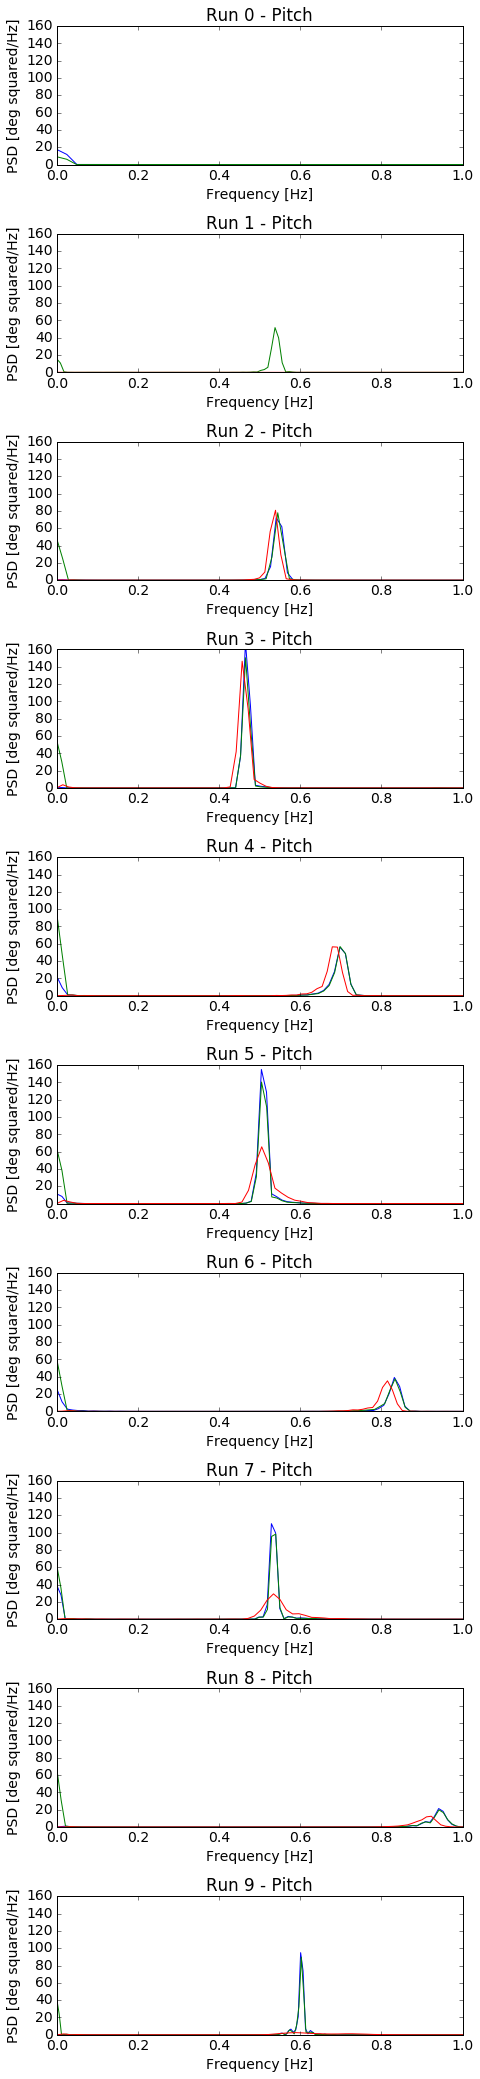

In [21]:
plt.figure()
pylab.rcParams['figure.figsize'] = 16, 36  # Length, Height
pylab.rcParams['font.size'] = 14
plt.subplots_adjust(hspace=.5)

ylow = 0
yhigh = 160

xlow = 0
xhigh = 1

plt.subplot(10,2,1)
plt.plot(f_dm0_p,Pxx_dm0_p,'b',f_dl0_p,Pxx_dl0_p,'g')
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 0 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

plt.subplot(10,2,3)
plt.plot(f_dl1_p,Pxx_dl1_p,'g',f_qb1_p,Pxx_qb1_p,'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 1 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

plt.subplot(10,2,5)
plt.plot(f_dm2_p,Pxx_dm2_p,'b',f_dl2_p,Pxx_dl2_p,'g',f_qb2_p,Pxx_qb2_p,'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 2 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

plt.subplot(10,2,7)
plt.plot(f_dm3_p,Pxx_dm3_p,'b',f_dl3_p,Pxx_dl3_p,'g',f_qb3_p,Pxx_qb3_p,'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 3 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

plt.subplot(10,2,9)
plt.plot(f_dm4_p,Pxx_dm4_p,'b',f_dl4_p,Pxx_dl4_p,'g',f_qb4_p,Pxx_qb4_p,'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 4 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

plt.subplot(10,2,11)
plt.plot(f_dm5_p,Pxx_dm5_p,'b',f_dl5_p,Pxx_dl5_p,'g',f_qb5_p,Pxx_qb5_p,'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 5 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

plt.subplot(10,2,13)
plt.plot(f_dm6_p,Pxx_dm6_p,'b',f_dl6_p,Pxx_dl6_p,'g',f_qb6_p,Pxx_qb6_p,'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 6 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

plt.subplot(10,2,15)
plt.plot(f_dm7_p,Pxx_dm7_p,'b',f_dl7_p,Pxx_dl7_p,'g',f_qb7_p,Pxx_qb7_p,'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 7 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

plt.subplot(10,2,17)
plt.plot(f_dm8_p,Pxx_dm8_p,'b',f_dl8_p,Pxx_dl8_p,'g',f_qb8_p,Pxx_qb8_p,'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 8 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

plt.subplot(10,2,19)
plt.plot(f_dm9_p,Pxx_dm9_p,'b',f_dl9_p,Pxx_dl9_p,'g',f_qb9_p,Pxx_qb9_p,'r') 
plt.ylim([ylow, yhigh])
plt.xlim([xlow, xhigh])
plt.title('Run 9 - Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [deg squared/Hz]')

# plt.subplot(10,2,2)
# plt.plot(f_dm0_p,sub_dm0['Roll (deg)'],'b',f_dl0_p,sub_dl0['Roll (deg)'],'g')
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 0 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

# plt.subplot(10,2,4)
# plt.plot(f_dl1_p,sub_dl1['Roll (deg)'],'g',f_qb1_p,sub_qb1['Roll'],'r') # No data
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 1 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

# plt.subplot(10,2,6)
# plt.plot(f_dm2_p,sub_dm2['Roll (deg)'],'b',f_dl2_p,sub_dl2['Roll (deg)'],'g',f_qb2_p,sub_qb2['Roll'],'r') 
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 2 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

# plt.subplot(10,2,8)
# plt.plot(f_dm3_p,sub_dm3['Roll (deg)'],'b',f_dl3_p,sub_dl3['Roll (deg)'],'g',f_qb3_p,sub_qb3['Roll'],'r') 
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 3 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

# plt.subplot(10,2,10)
# plt.plot(f_dm4_p,sub_dm4['Roll (deg)'],'b',f_dl4_p,sub_dl4['Roll (deg)'],'g',f_qb4_p,sub_qb4['Roll'],'r') 
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 4 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

# plt.subplot(10,2,12)
# plt.plot(f_dm5_p,sub_dm5['Roll (deg)'],'b',f_dl5_p,sub_dl5['Roll (deg)'],'g',f_qb5_p,sub_qb5['Roll'],'r') 
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 5 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

# plt.subplot(10,2,14)
# plt.plot(f_dm6_p,sub_dm6['Roll (deg)'],'b',f_dl6_p,sub_dl6['Roll (deg)'],'g',f_qb6_p,sub_qb6['Roll'],'r') 
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 6 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

# plt.subplot(10,2,16)
# plt.plot(f_dm7_p,sub_dm7['Roll (deg)'],'b',f_dl7_p,sub_dl7['Roll (deg)'],'g',f_qb7_p,sub_qb7['Roll'],'r') 
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 7 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

# plt.subplot(10,2,18)
# plt.plot(f_dm8_p,sub_dm8['Roll (deg)'],'b',f_dl8_p,sub_dl8['Roll (deg)'],'g',f_qb8_p,sub_qb8['Roll'],'r') 
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 8 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

# plt.subplot(10,2,20)
# plt.plot(f_dm9_p,sub_dm9['Roll (deg)'],'b',f_dl9_p,sub_dl9['Roll (deg)'],'g',f_qb9_p,sub_qb9['Roll'],'r') 
# plt.ylim([ylow, yhigh])
# plt.xlim([xlow, xhigh])
# plt.title('Run 9 - Roll')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Roll (deg)')

In [20]:
len(dm0['Pitch (deg)'])

812